### Crafting a Story
1. Executive
2. Dogs vs. Cats: Pet ownership in the US as collected by the American Veterinary Medical Association
3. Craft a narrative
4. 15 minute presentation

● Can I count something interesting?
● Can I find trends (e.g. high, low, increasing, decreasing, anomalies)?
● Can I make a bar plot or a histogram?
● Can I compare two related quantities? 
 Can I make a scatterplot?
● Can I make a time-series plot?
● Looking at the plots, what are some insights I can make?
● Can I see any correlations?
● Is there a hypothesis I can - and should - investigate further?
● What other questions are the insights leading me to ask? 

Submission: Submit links to a GitHub repository containing a Jupyter Notebook or a
PowerPoint. The file should contain:
● The questions you asked
● The trends you investigated
● The resulting visualizations and conclusions 

In [1]:
import pandas as pd
import numpy as np
import plotly as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
data = pd.read_csv('catsvdogs.csv')
data = data.drop('Unnamed: 12', axis=1)
data = data.iloc[1:48,:]

In [41]:
data.dtypes

Location                               object
Number of Households (in 1000)         object
Percentage of households with pets    float64
Number of Pet Households (in 1000)     object
Percentage of Dog Owners              float64
Dog Owning Households (1000s)          object
Mean Number of Dogs per household     float64
Dog Population (in 1000)               object
Percentage of Cat Owners              float64
Cat Owning Households                  object
Mean Number of Cats                   float64
Cat Population                         object
dtype: object

In [43]:
data.set_index('Location', inplace=True)


In [44]:
### separating to deal with strings
data_strings = data.select_dtypes(include=['object']) # select object type columns
data_float = data.drop(data_strings, axis=1) # select float type columns
data_clean = data_strings.replace({',':''}, regex=True)
data_clean = data_clean.astype(int) #convert to numbers
data_clean.dtypes

Number of Households (in 1000)        int64
Number of Pet Households (in 1000)    int64
Dog Owning Households (1000s)         int64
Dog Population (in 1000)              int64
Cat Owning Households                 int64
Cat Population                        int64
dtype: object

In [48]:
###getting rid of commas from the object datatypes so they can be converted
data2 = pd.concat([data_float, data_clean], axis=1) # concatenating full set
data2.dtypes

Percentage of households with pets    float64
Percentage of Dog Owners              float64
Mean Number of Dogs per household     float64
Percentage of Cat Owners              float64
Mean Number of Cats                   float64
Number of Households (in 1000)          int64
Number of Pet Households (in 1000)      int64
Dog Owning Households (1000s)           int64
Dog Population (in 1000)                int64
Cat Owning Households                   int64
Cat Population                          int64
dtype: object

In [49]:
data2.reset_index(inplace=True)
data2.head(5)

,Location,Percentage of households with pets,Percentage of Dog Owners,Mean Number of Dogs per household,Percentage of Cat Owners,Mean Number of Cats,Number of Households (in 1000),Number of Pet Households (in 1000),Dog Owning Households (1000s),Dog Population (in 1000),Cat Owning Households,Cat Population
0,Arizona,59.5,40.1,1.8,29.6,1.9,2515,1497,1008,1798,743,1438
1,Arkansas,62.4,47.9,2.0,30.6,2.3,1148,716,550,1097,351,810
2,California,52.9,32.8,1.6,28.3,1.9,12974,6865,4260,6687,3687,7118
3,Colorado,61.3,42.5,1.6,32.3,1.9,1986,1217,845,1349,642,1191
4,Connecticut,54.4,28.3,1.3,31.9,1.9,1337,728,379,507,427,796


## Pet Ownership
Pet ownership in the United States has become big business, and sales to pet owners have skyrocketed. In 2021, it is estimated that pet owners spent 109 billion on their non-human loved ones (https://petkeen.com/pet-spending-statistics/). Let's see the distribution for two of the most popular pets in the US, dogs and cats. {Note, Wyoming's data is missing from this dataset}


In [8]:
avg_PetHouses = round(np.mean(data2['Percentage of households with pets']), 1)
print("Overall, average percentage of US households who have pets is ", avg_PetHouses)

Overall, average percentage of US households who have pets is  56.7


So the majority of households have pets, but how many have dogs and how many have cats?


In [9]:
avg_DogHouses = round(np.mean(data2['Percentage of Dog Owners']), 1)
avg_CatHouses = round(np.mean(data2['Percentage of Cat Owners']), 1)
total_DogHouses = np.sum(data2['Dog Owning Households (1000s)'])
total_CatHouses = np.sum(data2['Cat Owning Households'])
print("Overall, average percentage of US households who have dogs is ", avg_DogHouses, 'a total of', total_DogHouses*1000,'homes with dogs')
print("Overall, average percentage of US households who have cats is ", avg_CatHouses, 'a total of', total_CatHouses*1000, 'homes with cats')

Overall, average percentage of US households who have dogs is  36.8 a total of 42049000 homes with dogs
Overall, average percentage of US households who have cats is  31.7 a total of 35099000 homes with cats


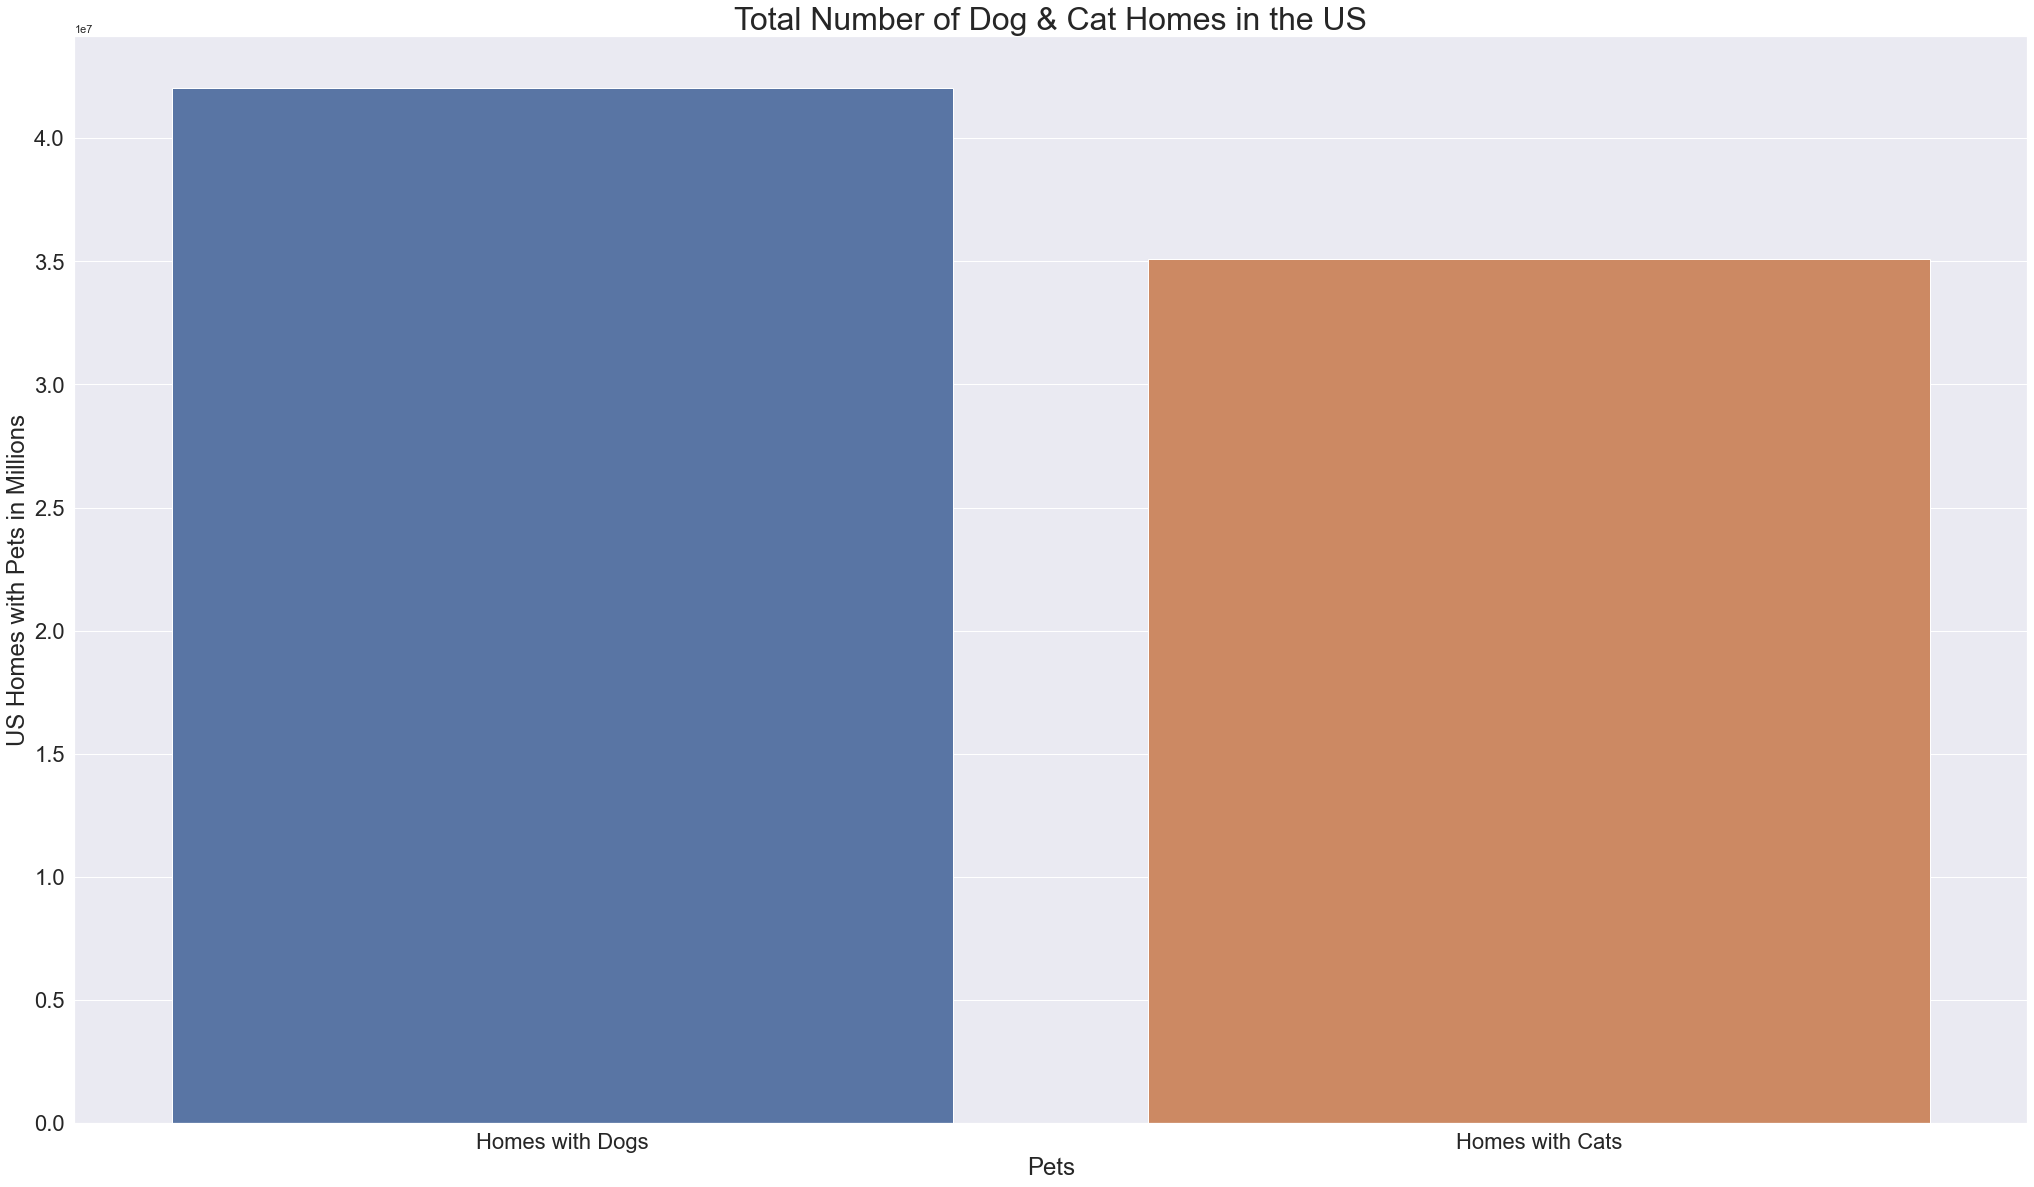

In [164]:
fig, ax = plt.subplots()
y = [42049000, 35099000]
hbars = sns.barplot(y=y, x=['Homes with Dogs', 'Homes with Cats'])
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.ylabel('US Homes with Pets in Millions', fontsize=24)
plt.xlabel('Pets', fontsize=24)
plt.title('Total Number of Dog & Cat Homes in the US', fontsize=32)
plt.savefig("Total Number of Homes with Dogs or Cats");

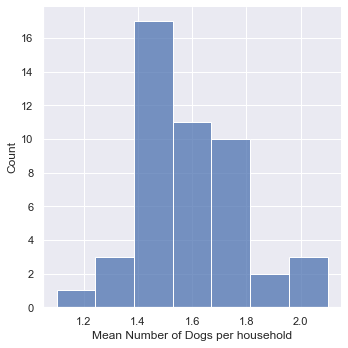

In [141]:
sns.displot(data2, x="Mean Number of Dogs per household")
plt.savefig("Assessment of Average Number of Dogs per Home");

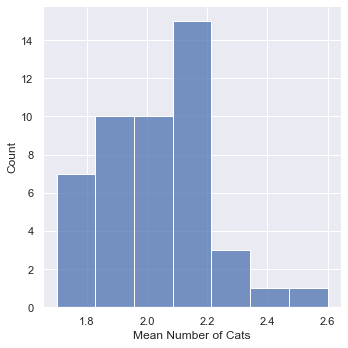

In [142]:
sns.displot(data2, x="Mean Number of Cats")
plt.savefig("Assessment of Average Number of Cats per Home");

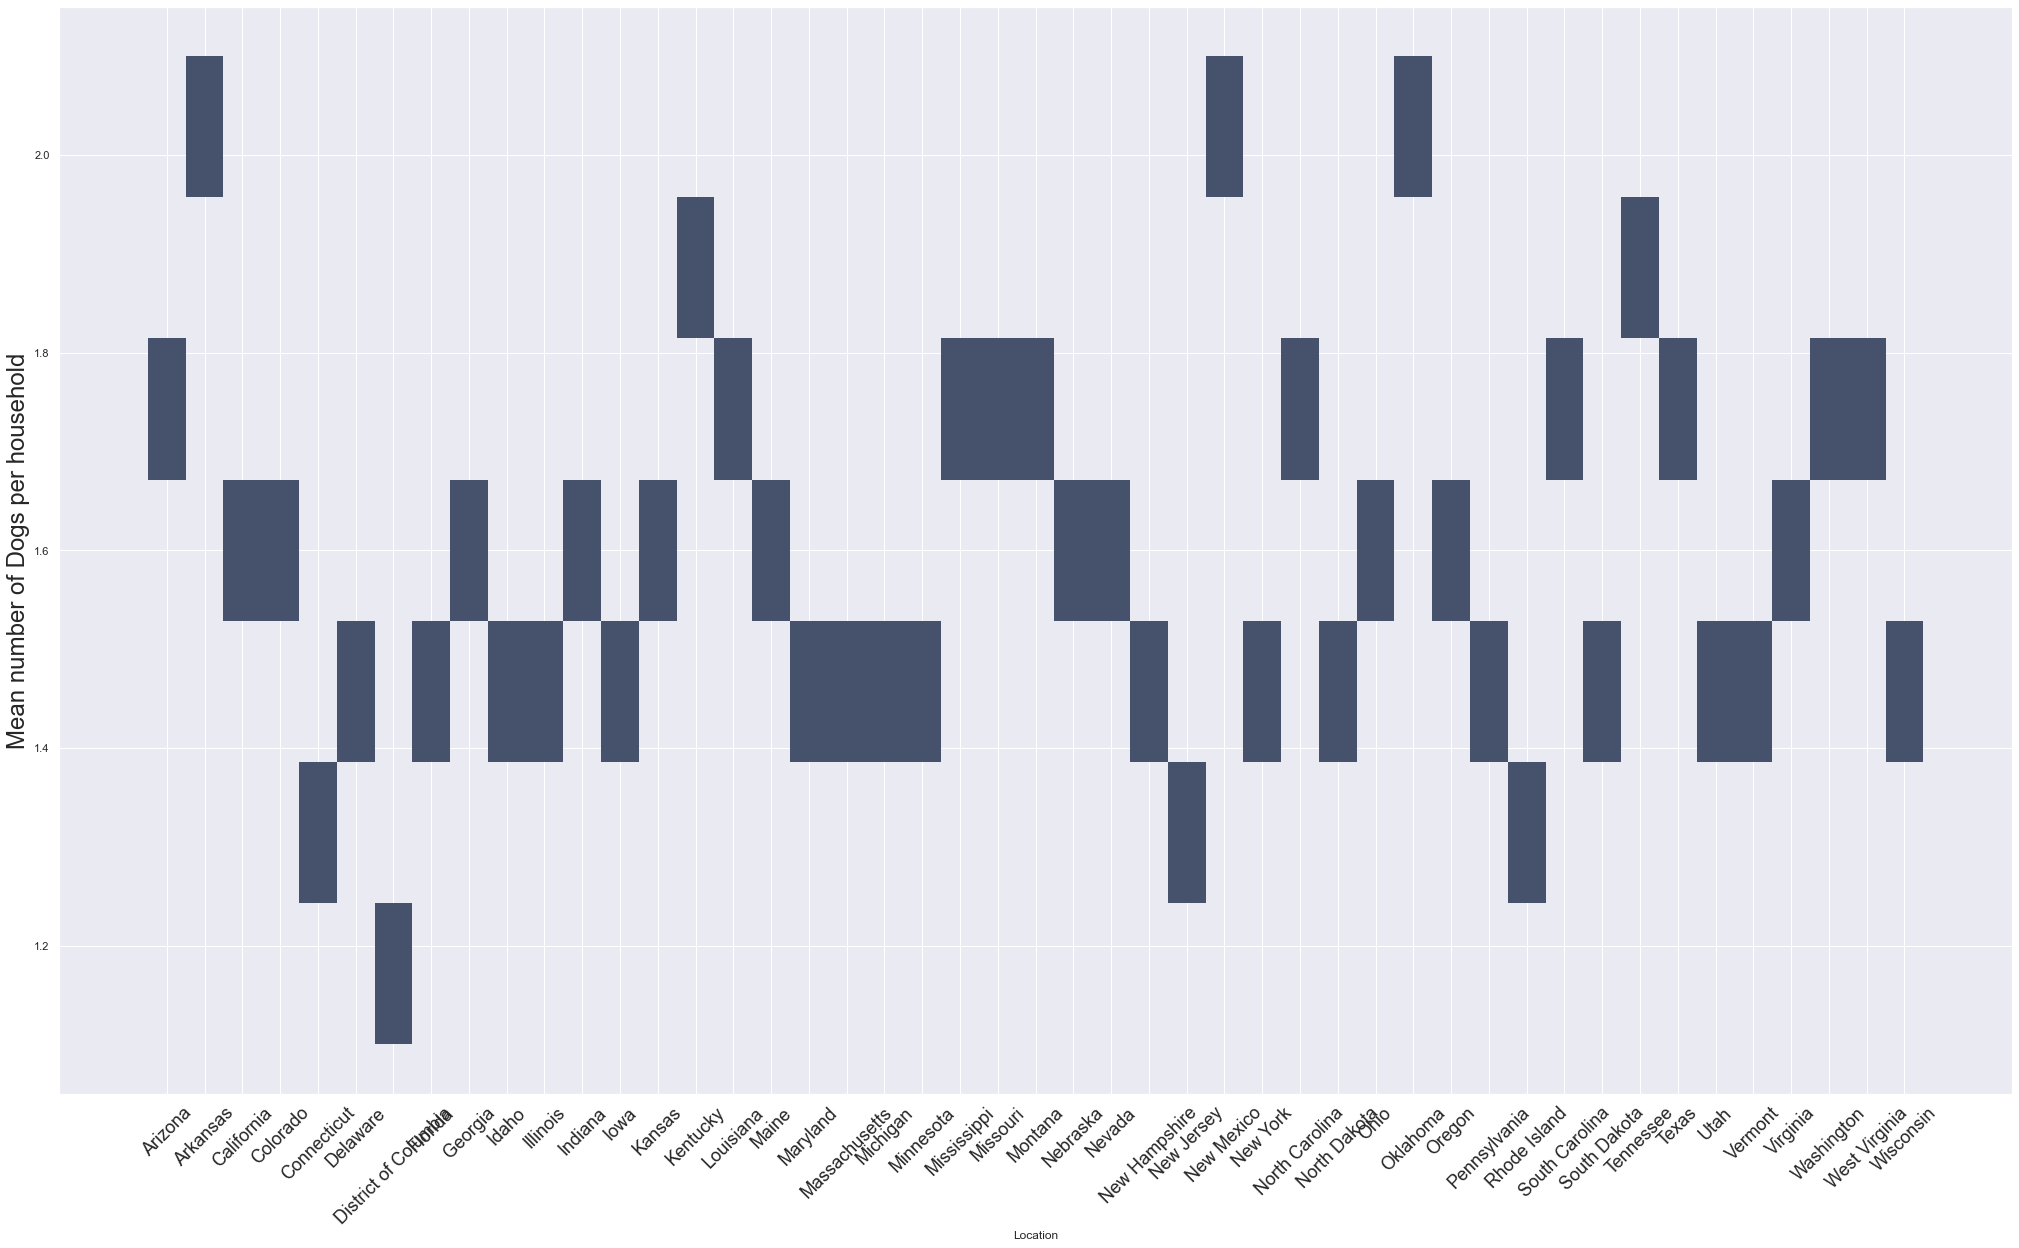

In [23]:
#sns.histplot(data=data2, x=data2.index, y="Mean Number of Dogs per household")
#plt.xticks(rotation = 45, fontsize=18)
#plt.ylabel('Mean number of Dogs per household', fontsize=24)
#plt.xticks(rotation = 45, fontsize=18)
#plt.yticks(fontsize=22)
#plt.title('The Range of the Number of Pets in a Home', fontsize=32)
#sns.set(rc = {'figure.figsize':(35,20)});
#plt.savefig("Mean dogs per house")

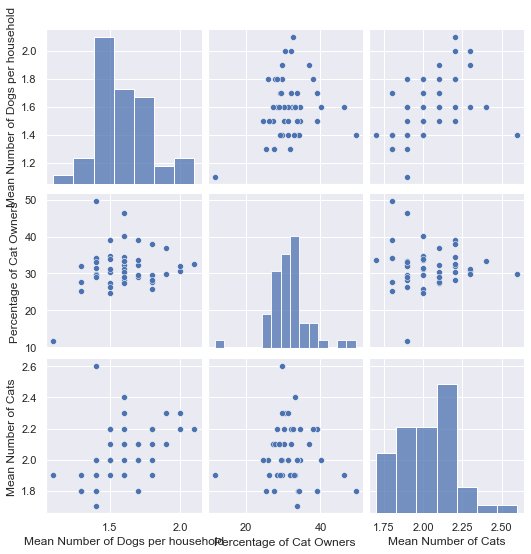

In [13]:
sns.pairplot(data2.iloc[:,2:5])

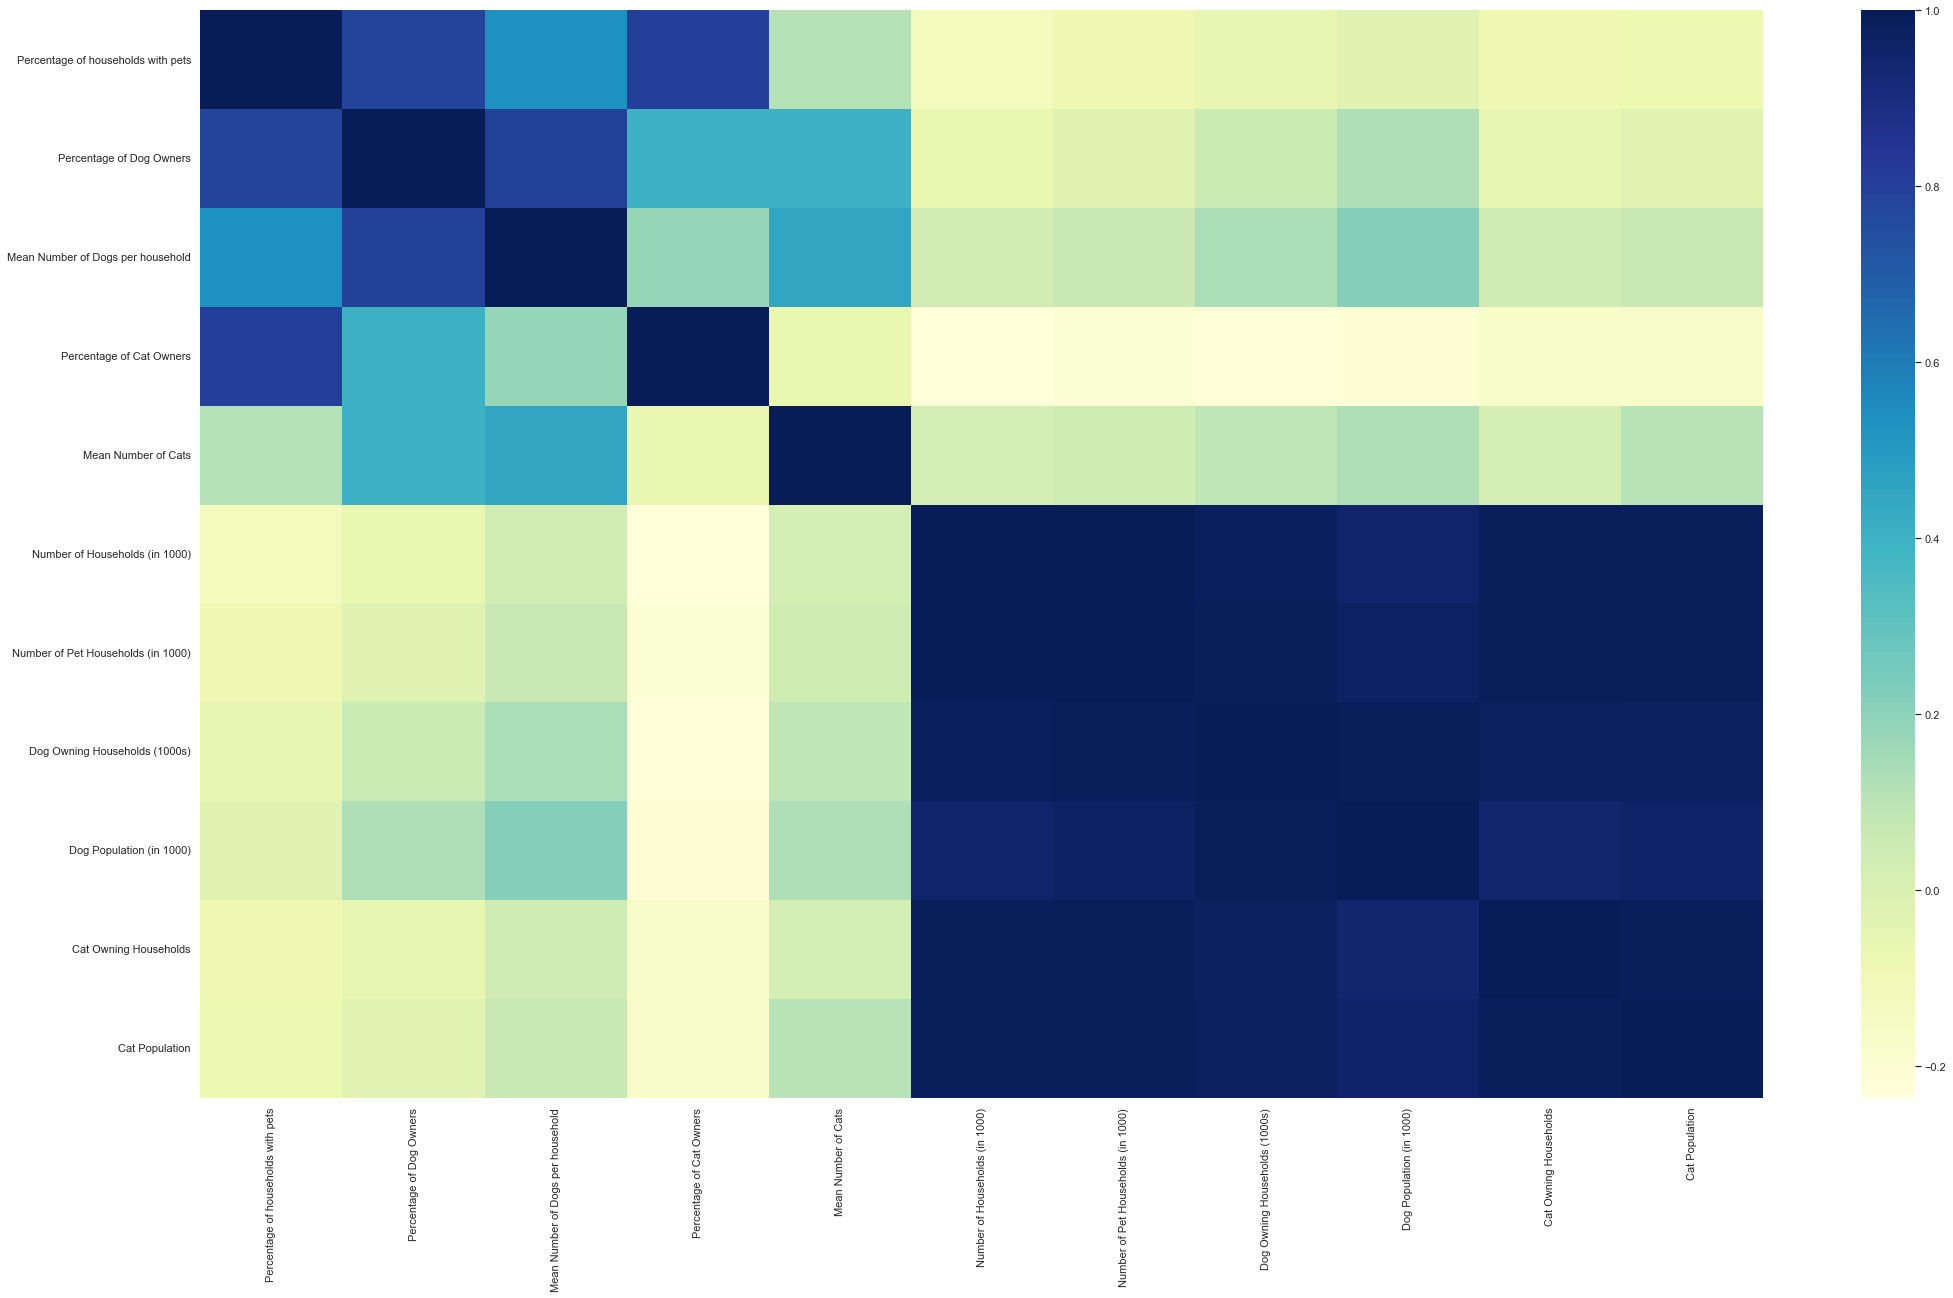

In [14]:
# Make a heatmap of the data 
correlation_matrix = data2.corr()
_ = sns.heatmap(correlation_matrix, cmap="YlGnBu")

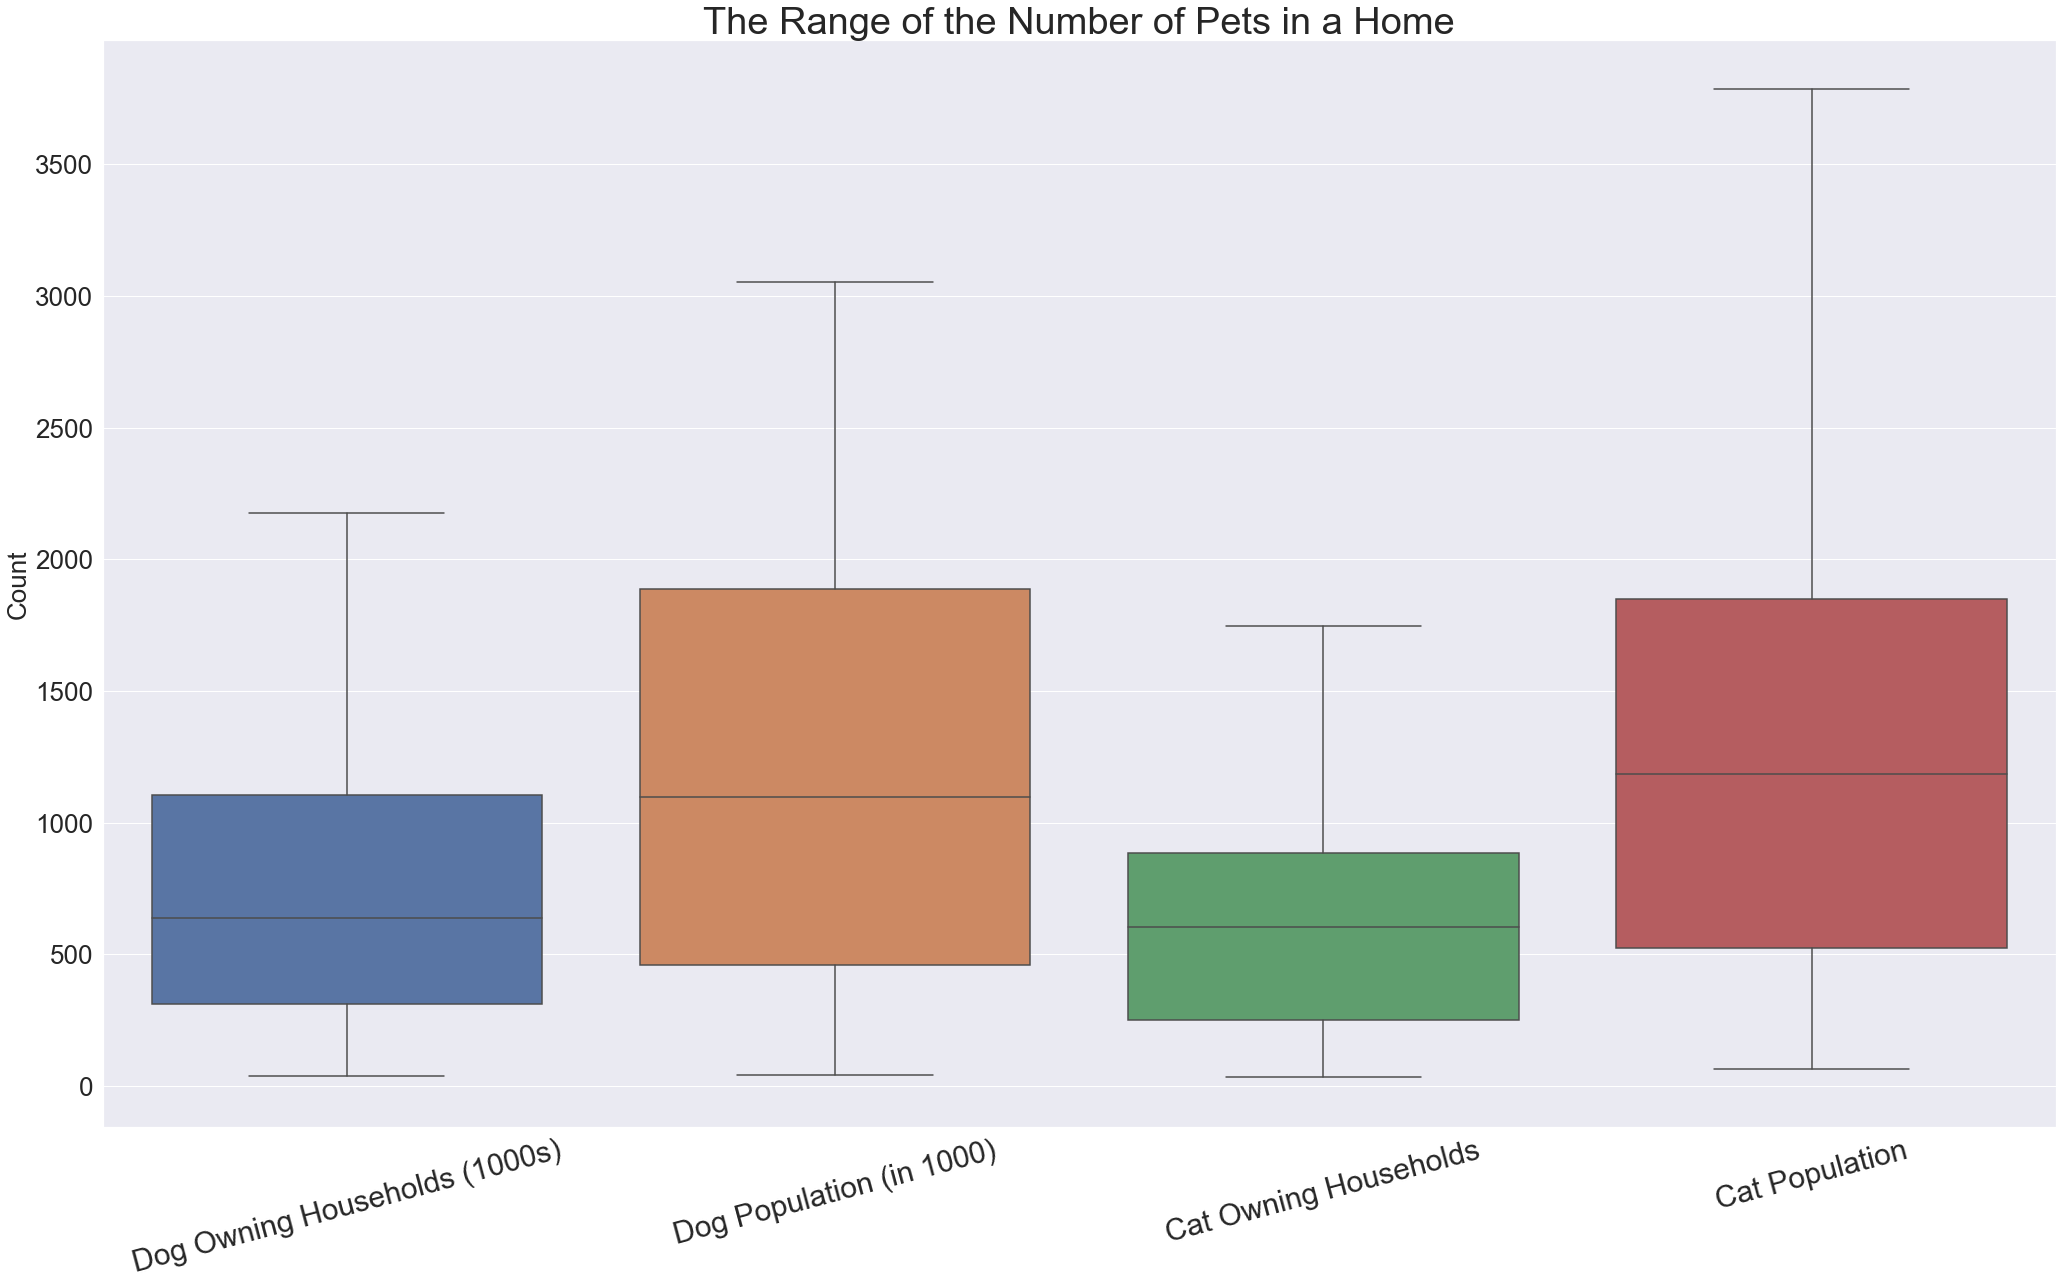

In [169]:
sns.boxplot(data=data2.iloc[:,8:12], showfliers=False)
plt.xticks(rotation = 15, fontsize=30)
plt.yticks(fontsize=26)
plt.title('The Range of the Number of Pets in a Home', fontsize=38)
plt.ylabel('Count', fontsize=26)
plt.savefig('Boxplot Pet Counts');

In [185]:
data2.sort_values(by=['Mean Number of Cats'], ascending=False)
top_mean_cats = data2[data2['Mean Number of Cats'] >= 2.0]
top_mean_cats = top_mean_cats.sort_values(by=['Mean Number of Cats'], ascending=False)
my_order = top_mean_cats['Location']

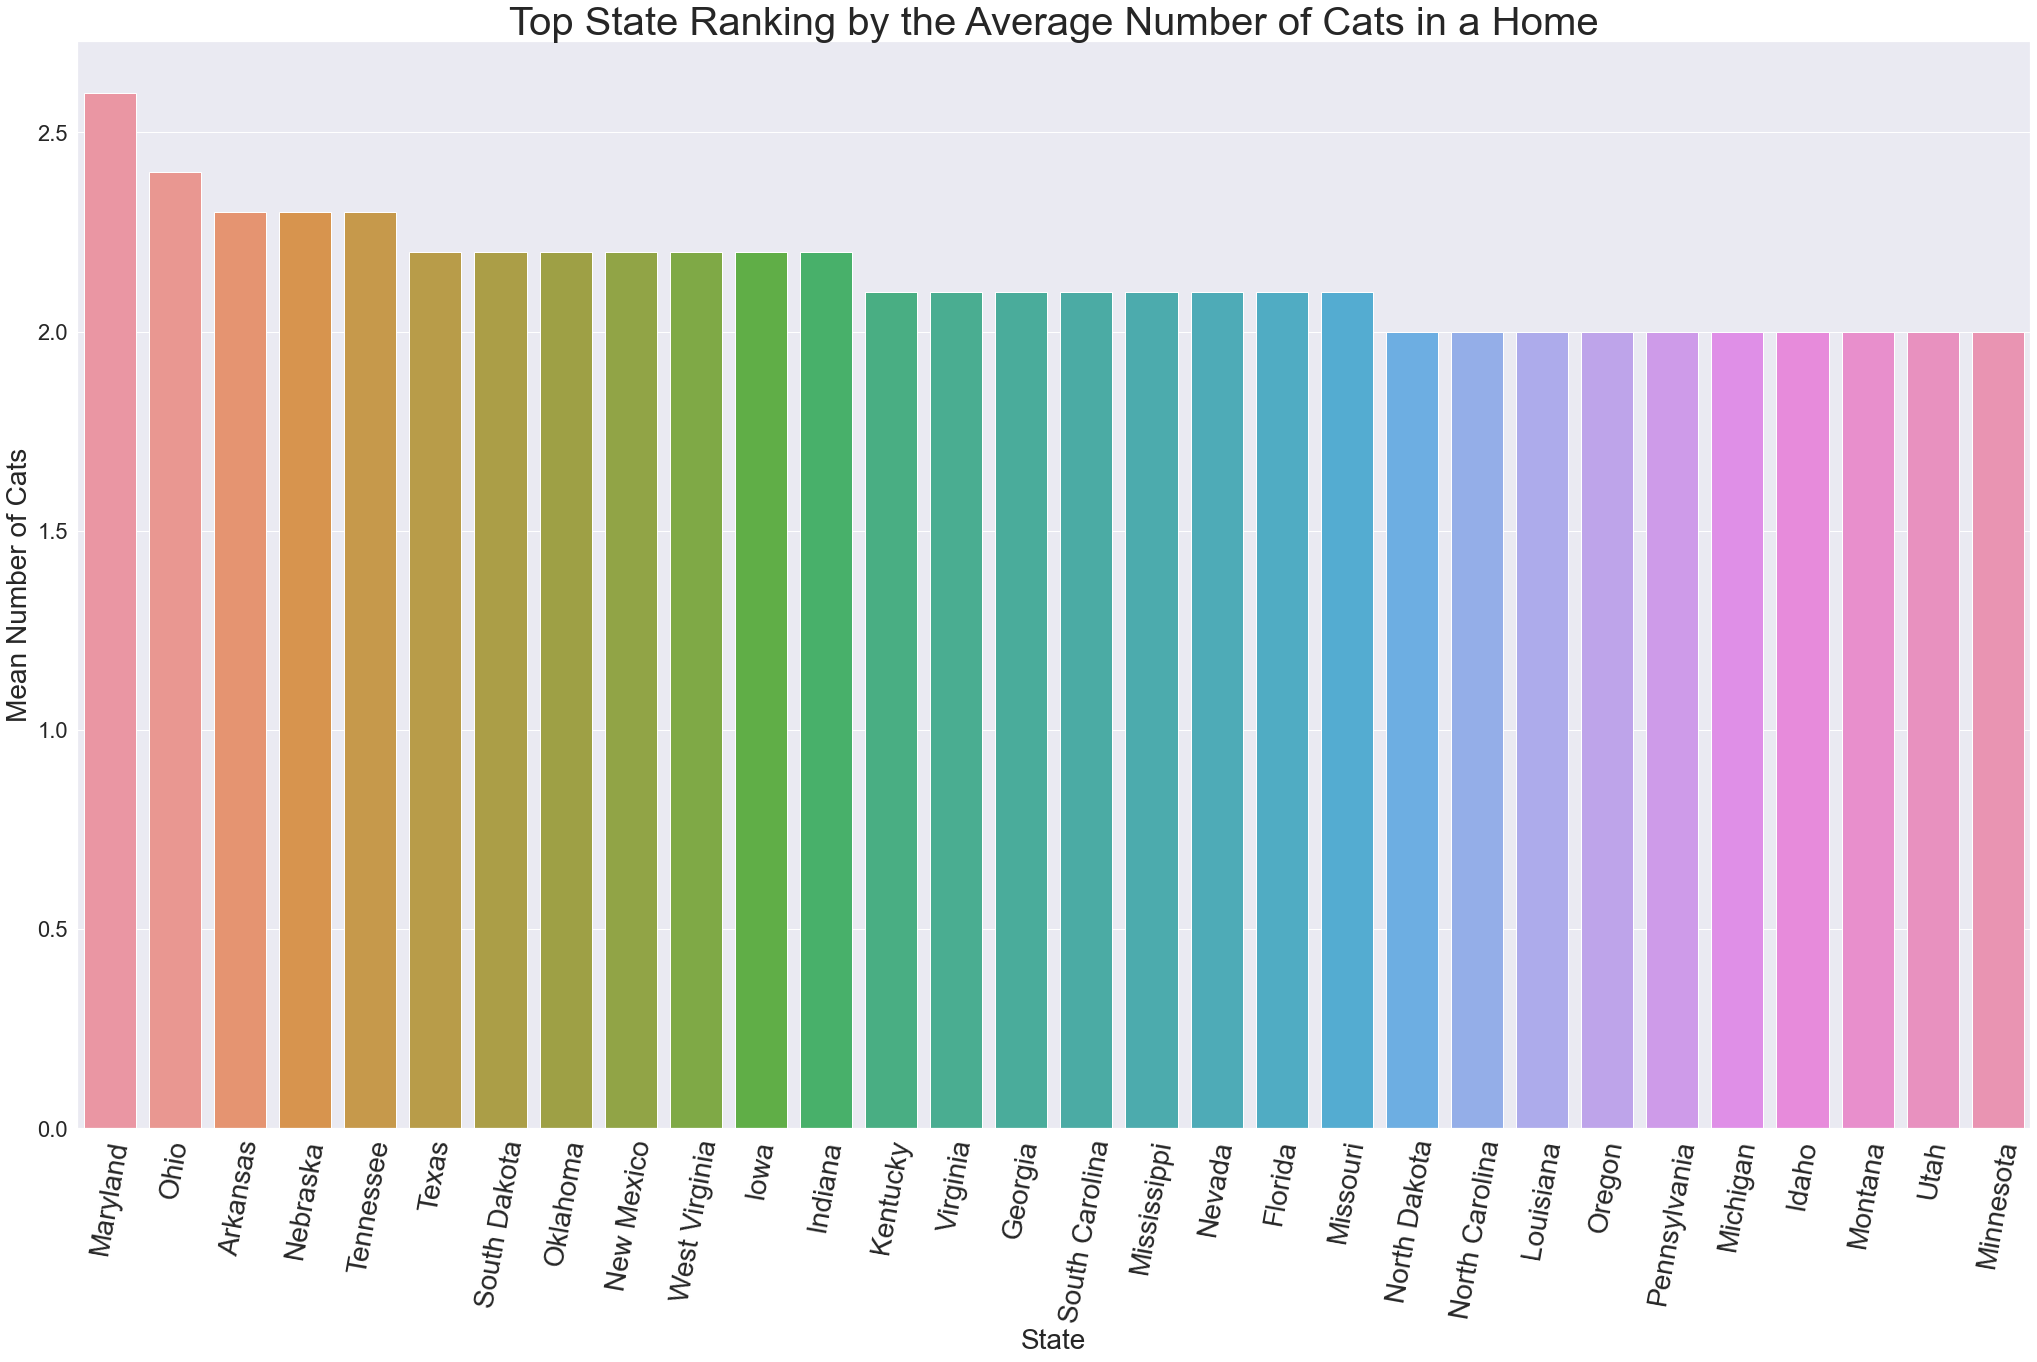

In [194]:
sns.barplot(data=top_mean_cats, x='Location', y='Mean Number of Cats', order=my_order)
plt.xticks(rotation = 80, fontsize=28)
plt.yticks(fontsize=22)
plt.ylabel('Mean Number of Cats', fontsize=28)
plt.xlabel('State', fontsize=28)
plt.title('Top State Ranking by the Average Number of Cats in a Home', fontsize=40)
plt.savefig('Mean Number of Cats Box by top states');

In [195]:
top_mean_dogs = data2[data2['Mean Number of Dogs per household'] >= 1.8]
top_mean_dogs = top_mean_dogs.sort_values(by=['Mean Number of Dogs per household'], ascending=False)
my_order = top_mean_dogs['Location']

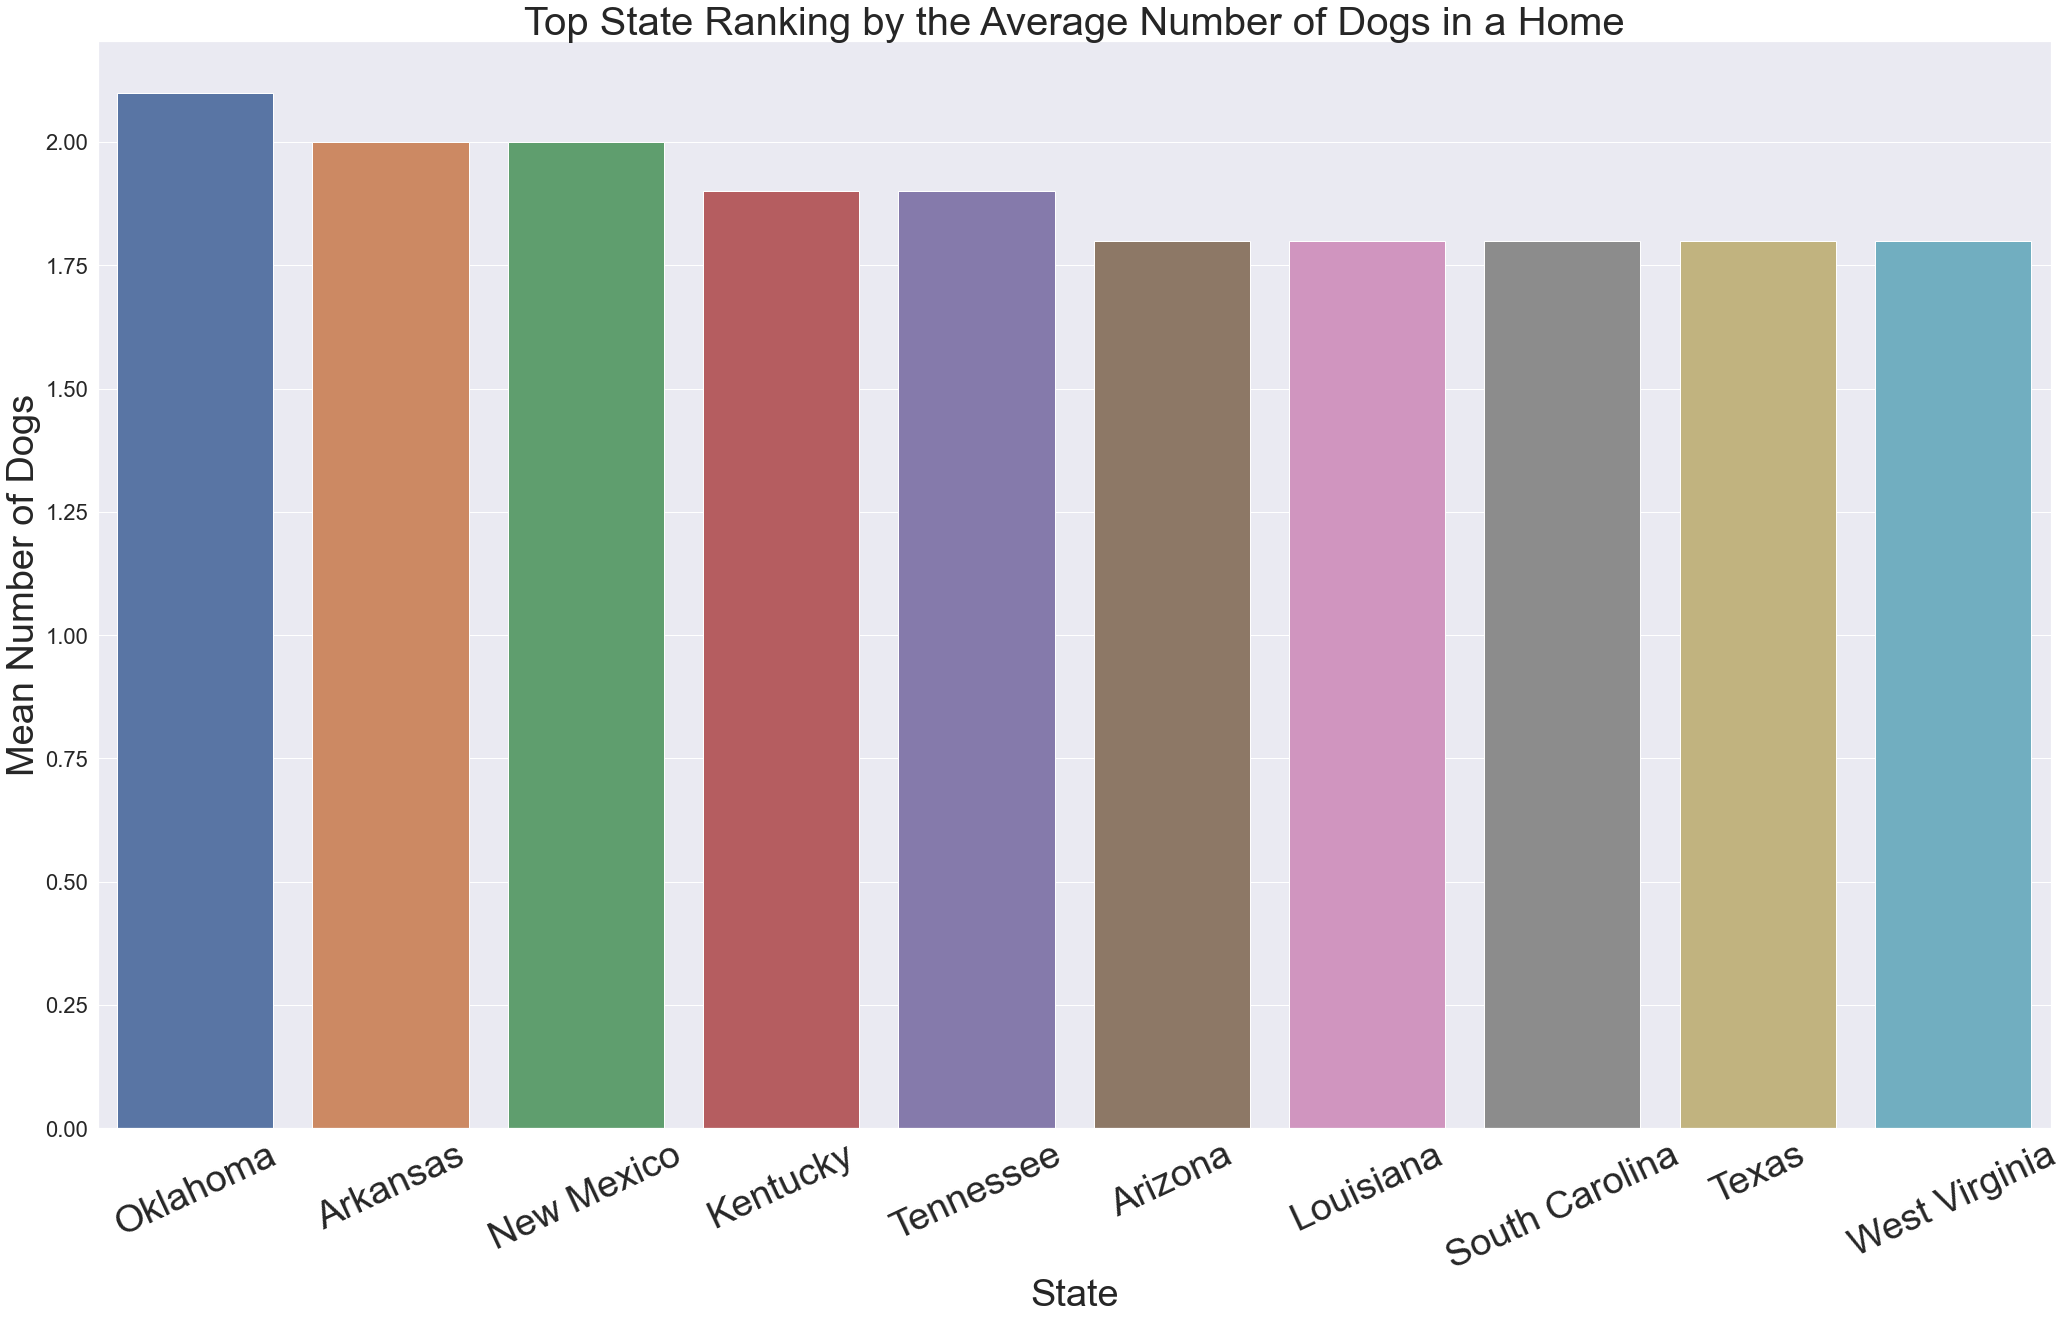

In [196]:
sns.barplot(data=top_mean_dogs, x='Location', y='Mean Number of Dogs per household', order = my_order)
plt.xticks(rotation = 25, fontsize=38)
plt.yticks(fontsize=22)
plt.ylabel('Mean Number of Dogs', fontsize=38)
plt.xlabel('State', fontsize=38)
plt.title('Top State Ranking by the Average Number of Dogs in a Home', fontsize=40)
plt.savefig('Mean Number of Dogs Box by top states');

In [110]:
### makeing a new column by region: 
regions = {
    'Alabama': 'South',
    'Texas': 'South',
    'Oklahoma':'South',
    'Arkansas':'South',
    'Louisiana':'South',
    'Virginia': 'South',
    'Mississippi': 'South',
    'Tennessee':'South',
    'North Carolina': 'South',
    'South Carolina': 'South',
    'Georgia': 'South',
    'Florida': 'South',
    'West Virginia':'South',
    'Kentucky': 'South',
    'Maryland':'South',
    'Delaware':'South',
    'District of Columbia': 'South', 
    'Wisconsin': 'Midwest',
    'Michigan': 'Midwest',
    'Ohio': 'Midwest',
    'Illinois': 'Midwest',
    'Indiana': 'Midwest',
    'Minnesota': 'Midwest',
    'South Dakota': 'Midwest',
    'North Dakota': 'Midwest',
    'Nebraska':'Midwest',
    'Kansas': 'Midwest',
    'Missouri':'Midwest',
    'Iowa': 'Midwest',
    'Maine': 'Northeast',
    'New York': 'Northeast',
    'New Jersey': 'Northeast',
    'Pennsylvania': 'Northeast',
    'New York': 'Northeast',
    'Vermont':'Northeast',
    'New Hampshire':'Northeast',
    'Massachusetts':'Northeast',
    'Connecticut': 'Northeast',
    'Rhode Island':'Northeast',
    'Washington': 'West',
    'Oregon': 'West',
    'California': 'West',
    'Montana':'West',
    'Wyoming':'West',
    'Colorado': 'West',
    'New Mexico': 'West',
    'Arizona':'West',
    'Idaho': 'West',
    'Utah': 'West',
    'Nevada': 'West',
    'Alaska': 'West',
    'Hawaii': 'West'
 }
len(regions)

51

In [111]:
def get_region(state):
    return regions[state]
data2['Region'] = data2['Location'].apply(get_region)

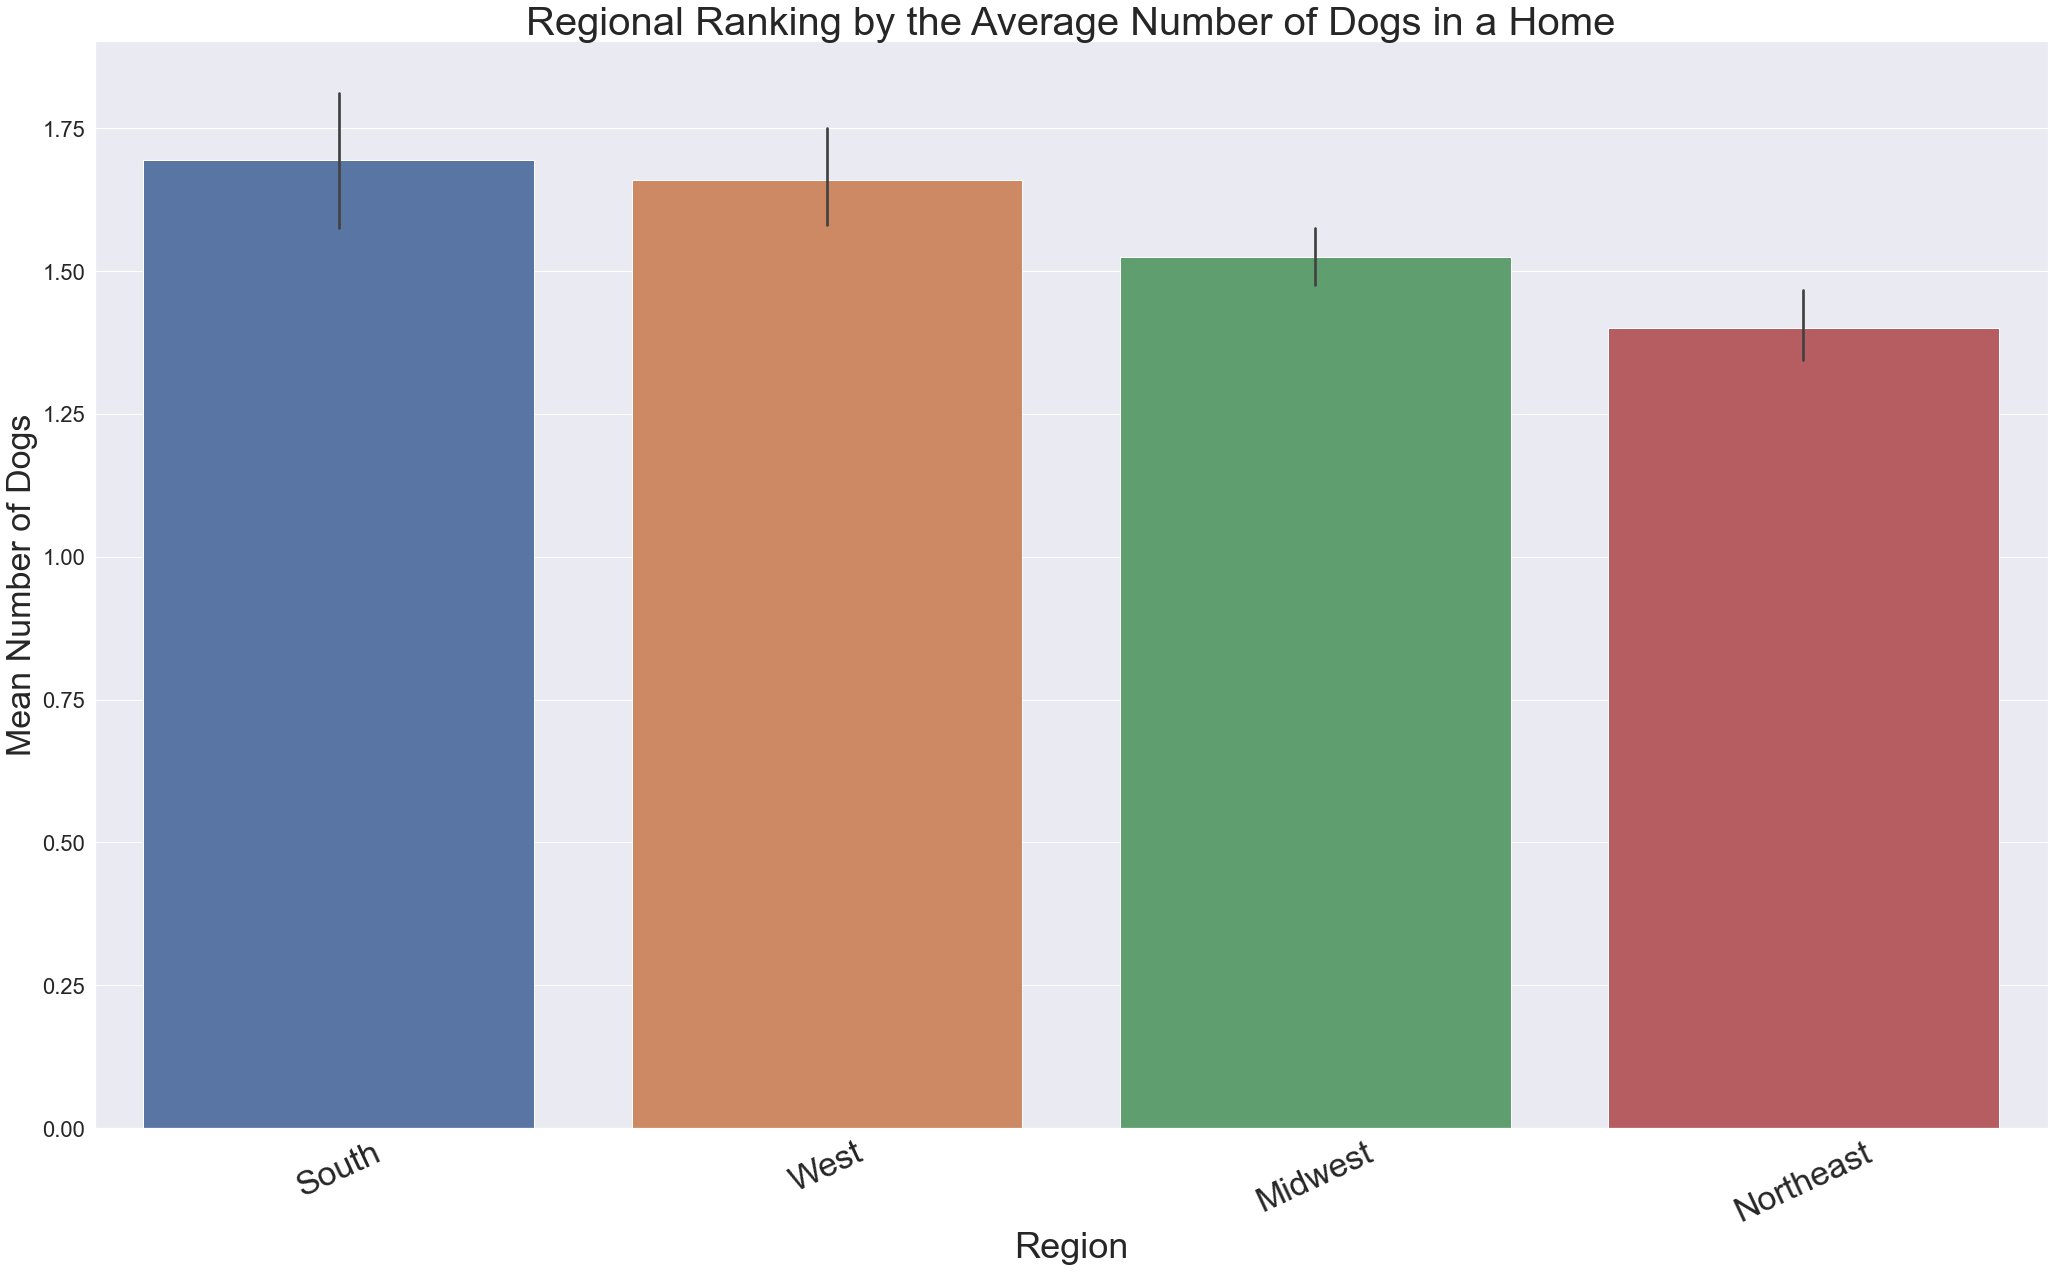

In [199]:
sns.barplot(data=data2, x='Region', y='Mean Number of Dogs per household', order=['South', 'West', 'Midwest', 'Northeast'])
plt.xticks(rotation = 25, fontsize=34)
plt.yticks(fontsize=22)
plt.ylabel('Mean Number of Dogs', fontsize=34)
plt.xlabel('Region', fontsize=36)
plt.title('Regional Ranking by the Average Number of Dogs in a Home', fontsize=40)
plt.savefig('Mean Number of Dogs Box by Region');

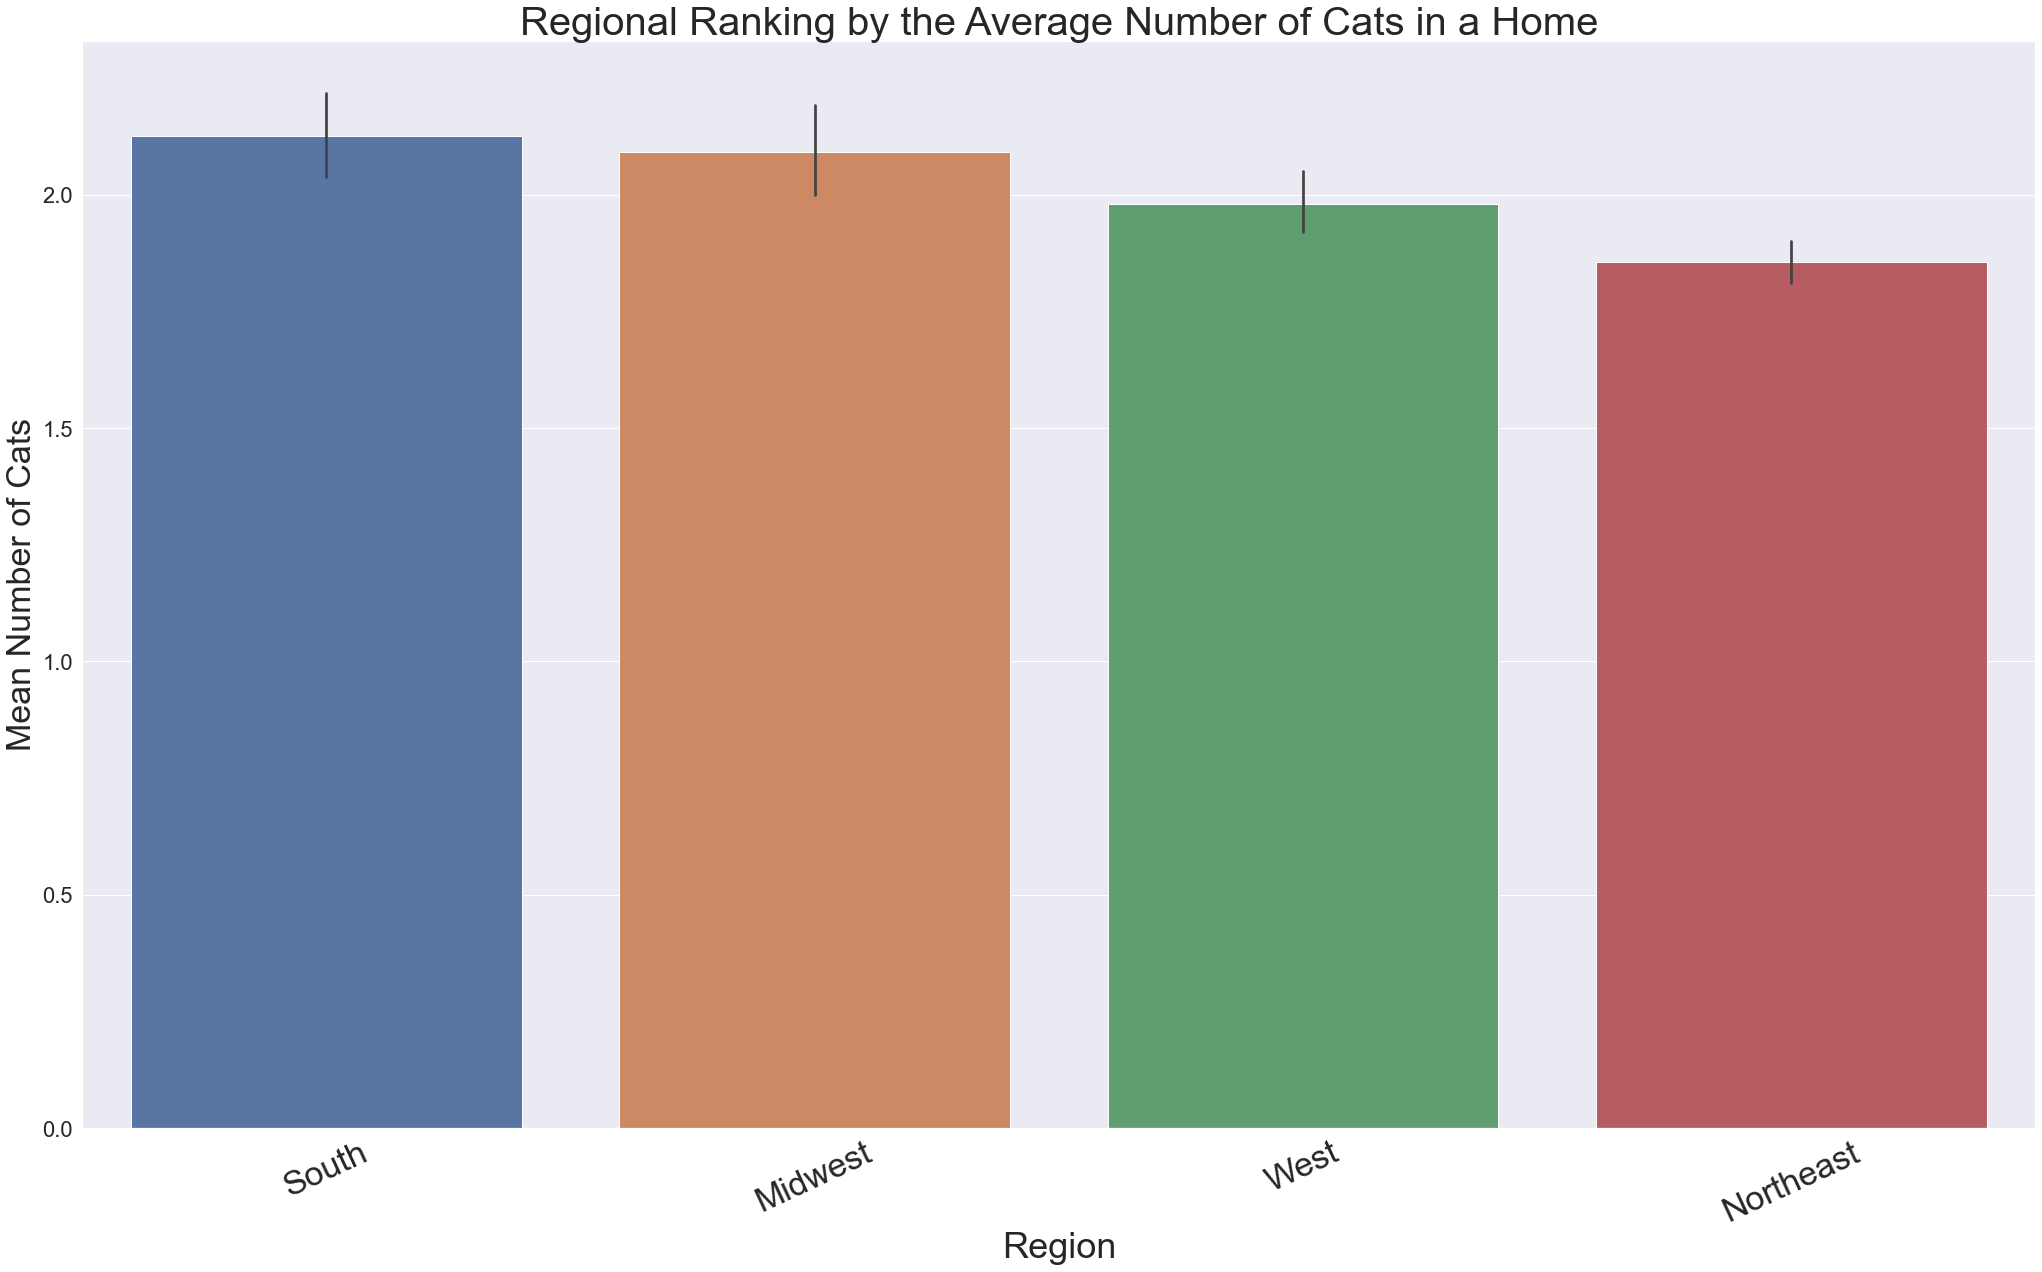

In [201]:
sns.barplot(data=data2, x='Region', y='Mean Number of Cats', order=['South', 'Midwest','West','Northeast'])
plt.xticks(rotation = 25, fontsize=34)
plt.yticks(fontsize=22)
plt.ylabel('Mean Number of Cats', fontsize=34)
plt.xlabel('Region', fontsize=36)
plt.title('Regional Ranking by the Average Number of Cats in a Home', fontsize=40)
plt.savefig('Mean Number of Cats Box by Region');